# **Data preparation and visualization for buzzard catalog**

## Initialisation

Some manipulations on the original catalog.fits catalog is within a .fits file. First step is to convert it to .dat for zphota use

In [1]:
# import and settings
%matplotlib inline
#
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
#
import astropy.io.fits as pf
from astropy.visualization import astropy_mpl_style
from astropy.visualization import simple_norm
from astropy.visualization import MinMaxInterval
from astropy.visualization import hist

In [2]:
# load FITS image
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
print(base_dir)
# file_path = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Final_Buzzard_training_file.fits')
file_path = os.path.join(base_dir,'simulation_catalogs/DES/DES_STARCAT/Y6A1_FGCM_V3_3_1_PSF_ALL_STARS.fits')
file = pf.open(file_path)
file.info()


/home/hallouin/Documents/thall_2025/photoz/lephare/training_stats
Filename: /home/hallouin/Documents/thall_2025/photoz/lephare/training_stats/simulation_catalogs/DES/DES_STARCAT/Y6A1_FGCM_V3_3_1_PSF_ALL_STARS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     48   17359534R x 19C   [K, D, D, K, E, E, E, E, E, E, E, E, E, E, K, K, K, K, K]   


In [3]:
file[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  112 / width of table in bytes                        
NAXIS2  =             17359534 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
TTYPE1  = 'FGCM_ID '           / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'RA      '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'DEC     '        

Data check

In [4]:
# list available keywords /home/hallouin/Documents/thall_2025/photoz/lephare/training_stats/output_data/config_file.para
print(list(file[1].header.keys()))

['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'PCOUNT', 'GCOUNT', 'TFIELDS', 'TTYPE1', 'TFORM1', 'TTYPE2', 'TFORM2', 'TTYPE3', 'TFORM3', 'TTYPE4', 'TFORM4', 'TTYPE5', 'TFORM5', 'TTYPE6', 'TFORM6', 'TTYPE7', 'TFORM7', 'TTYPE8', 'TFORM8', 'TTYPE9', 'TFORM9', 'TTYPE10', 'TFORM10', 'TTYPE11', 'TFORM11', 'TTYPE12', 'TFORM12', 'TTYPE13', 'TFORM13', 'TTYPE14', 'TFORM14', 'TTYPE15', 'TFORM15', 'TTYPE16', 'TFORM16', 'TTYPE17', 'TFORM17', 'TTYPE18', 'TFORM18', 'TTYPE19', 'TFORM19', 'HISTORY', 'COMMENT']


In [5]:
data = file[1].data
print(data)
len(data)

[(    9519,  87.02068125,  17.36075225,  0, 18.187103, 16.980692, 16.570278, 16.31787 , 16.247889, 0.08720841, 0.01451915, 0.00866957, 0.0085573 , 0.00471187, 3, 4, 3, 4, 4)
 (    9520,  87.053319  ,  17.292848  ,  0, 17.38387 , 16.941877, 16.795221, 16.685444, 16.685858, 0.03667504, 0.01401551, 0.01053623, 0.01186546, 0.00662762, 4, 4, 3, 4, 4)
 (    9521,  87.680925  ,  17.51933225,  0, 18.175215, 17.642887, 17.444273, 17.357828, 17.31626 , 0.08590204, 0.03092411, 0.01883927, 0.02222482, 0.01113288, 3, 3, 3, 4, 4)
 ...
 (36687536, 350.89667629, -64.56986686,  0, 21.714602, 20.441353, 19.952679, 19.687973, 19.64106 , 0.01040848, 0.00464847, 0.00372148, 0.00475927, 0.02169778, 6, 6, 7, 7, 1)
 (36687538, 350.9531298 , -64.601782  ,  0, 19.431292, 18.127726, 17.494669, 17.195322, 17.13338 , 0.00279259, 0.00120805, 0.0009858 , 0.00105041, 0.00287854, 4, 5, 5, 5, 4)
 (36687539, 350.9682602 , -64.5571152 , 16, 17.963074, 17.553307, 17.442686, 17.40066 , 17.427874, 0.00105798, 0.00105606, 0.

17359534

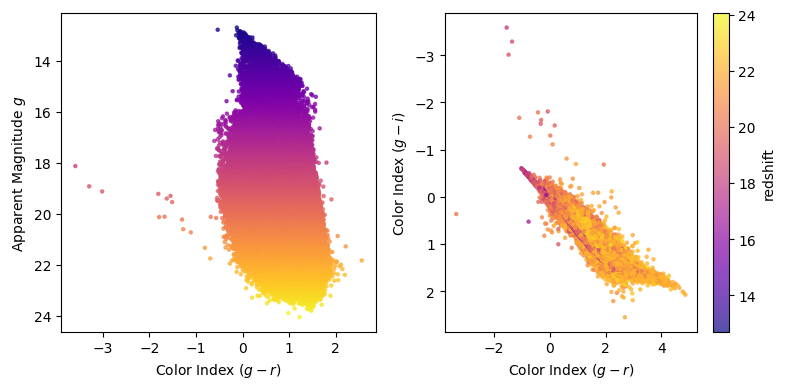

In [7]:
# plot magnitude
filtered_data = data[data['MAG_STD_G'] < 50 ][:1000000]
filtered_data = filtered_data[filtered_data['MAG_STD_R'] < 50][:1000000]
# filtered_data = filtered_data[filtered_data['redshift'] < 0.1]
# filtered_data = filtered_data[filtered_data['redshift'] > 0.06]
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(filtered_data['MAG_STD_G']-filtered_data['MAG_STD_R'],filtered_data['MAG_STD_G'],s=5, c=filtered_data['MAG_STD_G'], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Apparent Magnitude $g$")
# plt.xlim((-5,10))
# plt.ylim((15,40))
plt.gca().invert_yaxis()

plt.subplot(122)
plt.scatter(filtered_data['MAG_STD_G']-filtered_data['MAG_STD_i'],filtered_data['MAG_STD_G']-filtered_data['MAG_STD_R'],s=5, c=filtered_data['MAG_STD_G'], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Color Index $(g - i)$")
# plt.xlim((-5,12))
# plt.ylim((-2.5,12))
plt.gca().invert_yaxis()

plt.colorbar(label="redshift")
plt.tight_layout()
plt.show()

In [ ]:
# Plot redshift distribution (Chi2)
# plt.hist(filtered_data['redshift'],bins=20)


Buzzard training file - Convert fits to ascii for zphota

In [ ]:
### buzzard training
# load FITS image
file_path = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Final_Buzzard_training_file.fits')

file = pf.open(file_path)

data = file[1].data


columns_order = [
    'BuzzID', 
    'LSSTu', 'LSSTg', 'LSSTr', 'LSSTi', 'LSSTz', 'LSSTy',
    'MAG', 'errLSSTg', 'errLSSTr', 'errLSSTi', 'errLSSTz', 'errLSSTy']
context = np.zeros(len(data), dtype='int')
data_array = np.vstack([[data[col] for col in columns_order],context, data['redshift']]).T

###
CAT_IN_PATH = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Final_Buzzard_training_file.dat')
formats = ['%d'] + ['%.5f'] * 12 + ['%d'] + ['%.5f']
np.savetxt(CAT_IN_PATH, data_array, fmt=formats)


In [ ]:
### Same but with shuffle since sources are classified in ascending order redshift
#useful for tests on shortlists

file = pf.open(file_path)

data = file[1].data
columns_order = [
    'BuzzID', 
    'LSSTu', 'LSSTg', 'LSSTr', 'LSSTi', 'LSSTz', 'LSSTy',
    'errLSSTu', 'errLSSTg', 'errLSSTr', 'errLSSTi', 'errLSSTz', 'errLSSTy']

data = data[data['LSSTg'] > 10]

context = np.zeros(len(data), dtype='int')
data_array = np.vstack([[data[col] for col in columns_order],context, data['redshift']]).T
data_shuffled = pd.DataFrame(data_array).sample(frac=1)
# print(data_shuffled)

###
CAT_IN_PATH = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Shuffle_Buzzard_training_file.dat')
formats = ['%d'] + ['%.5f'] * 12 + ['%d'] + ['%.5f']
np.savetxt(CAT_IN_PATH, data_shuffled, fmt=formats)

In [ ]:
###Shuffle file from ascii format
file_dat_path = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/zbest175_Buzzard_training_file.dat')
file_dat = np.loadtxt(file_dat_path)
file_dat_shuffled = pd.DataFrame(file_dat).sample(frac=1)
# print(file_dat_shuffled)

###
CAT_IN_PATH = os.path.join(base_dir, 'simulation_catalogs/buzzard_base/Shuffle175_Buzzard_training_file.dat')
formats = ['%d'] + ['%.5f'] * 12 + ['%d'] + ['%.5f']
np.savetxt(file_dat_path, file_dat_shuffled, fmt=formats)


In [ ]:
#files
base_dir = '/home/hallouin/Documents/thall_2025/lephare/'

mag_gal_path = os.path.join('/home/hallouin/.cache/lephare/work/lib_mag/buzzard_mags.dat')
mag_gal = np.loadtxt(mag_gal_path)
mag_gal_g = mag_gal[:,8][1:]
mag_gal_r = mag_gal[:,9][1:]
# plot mag_gal vs mag_in
# mag_gal_g = mag_gal_g[mag_gal_g > 0]
# mag_gal_r = mag_gal_r[mag_gal_g > 0]

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(mag_gal_g-mag_gal_r,mag_gal_g,s=5)#, c=filtered_data['redshift'], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Apparent Magnitude $g$")
plt.gca().invert_yaxis()

# plt.colorbar(label="redshift")
plt.tight_layout()
plt.show()


DES

In [7]:
###transform
# load FITS image
file_path = os.path.join(base_dir, 'simulation_catalogs/DES/DES_STARCAT/Y6A1_FGCM_V3_3_1_PSF_ALL_STARS.fits')

file = pf.open(file_path)

data = file[1].data


columns_order = [
    'FGCM_ID', 
    'MAG_STD_G', 'MAG_STD_R', 'MAG_STD_I', 'MAG_STD_Z', 'MAG_STD_Y',
    'MAGERR_STD_G', 'MAGERR_STD_R', 'MAGERR_STD_R', 'MAGERR_STD_Z', 'MAGERR_STD_Y']
data_array = np.vstack([[data[col] for col in columns_order],]).T


###
CAT_IN_PATH = os.path.join(base_dir, 'simulation_catalogs/DES/DES_STARCAT/Y6A1_FGCM_V3_3_1_PSF_ALL_STARS.dat')
formats = ['%d'] + ['%.5f'] * 10
np.savetxt(CAT_IN_PATH, data_array, fmt=formats)


In [ ]:
###Shuffle file from ascii format
file_dat_path = os.path.join(base_dir, 'simulation_catalogs/DES/DES_STARCAT/Y6A1_FGCM_V3_3_1_PSF_ALL_STARS.dat')
file_dat = np.loadtxt(file_dat_path)
file_dat_shuffled = pd.DataFrame(file_dat).sample(frac=1)
# print(file_dat_shuffled)

shuffle_dat_path = os.path.join(base_dir, 'simulation_catalogs/DES/DES_STARCAT/Y6A1_FGCM_V3_3_1_PSF_ALL_STARS_shuffled.dat')
formats = ['%d'] + ['%.5f'] * 10
np.savetxt(shuffle_dat_path, file_dat_shuffled, fmt=formats)

: 